# SOMENTE O ITEM 1 É OBRIGATÓRIO PARA APRESENTAÇÃO!

# História das Olimpíadas - Parte 2
_(créditos ao prof. Rafael Moreira)_

Você recentemente trabalhou (ou está trabalhando) em uma análise de dados históricos dos jogos olímpicos utilizando o Pandas para auxiliá-lo.

Desde que você iniciou seus trabalhos nesse projeto, novas ferramentas bastante poderosas foram ensinadas! O seu papel agora será utilizar essas novas ferramentas para gerar algumas visualizações que tornarão certas informações muito mais claras.

Utilize qualquer uma das bibliotecas estudadas (```matplotlib```, ```seaborn``` e ```plotly```) para realizar as atividades propostas. Não há problema em usar apenas uma para realizar todas as atividades, nem em utilizar cada uma delas em uma atividade diferente - siga suas preferências pessoais!

Utilize os (muitos) parâmetros permitidos por cada função e/ou atributos dos objetos fornecidos pelas bibliotecas para criar uma identidade visual coesa para ser utilizada em todo o projeto. Use títulos, legendas e rótulos nos eixos para deixar os gráficos verdadeiramente informativos. E não se esqueça que a simples escolha das cores a serem utilizadas pode tornar os gráficos ainda mais interessantes!

Você utilizará o mesmo dataset fornecido no projeto anterior. Não há problemas em reaproveitar códigos do projeto anterior para economizar tempo e focar seus esforços na geração dos gráficos.

Para começar, importe o Pandas e carregue o arquivo ```athlete_events.csv``` fornecido no projeto anterior.

In [332]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio

pio.templates.default = "plotly_dark"

sns.set_style('dark')

df_olimpiadas = pd.read_csv('athlete_events.csv')
df_olimpiadas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## 1. O Brasil nas Olimpíadas

Vamos começar filtrando novamente os dados que iremos trabalhar. Crie um DataFrame contendo apenas informações sobre atletas **medalhistas** brasileiros.

In [333]:
df_olimpiadas_med_br = df_olimpiadas[(df_olimpiadas.NOC == 'BRA') & (df_olimpiadas.Medal.notna())]
df_olimpiadas_med_br.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver
1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver
1668,925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,Gold
1733,966,Daniel Adler,M,26.0,180.0,72.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Silver
1856,1020,Adriana Aparecida dos Santos,F,25.0,180.0,61.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver


Vamos caracterizar fisicamente nossos medalhistas, verificando se há alguma correlação entre o desempenho em certos esportes e o tipo físico dos atletas. 

Gere um gráfico de barras contendo os diferentes esportes no eixo X e a altura dos atletas no eixo Y. Utilize barras lado-a-lado para separar atletas do sexo masculino e feminino.

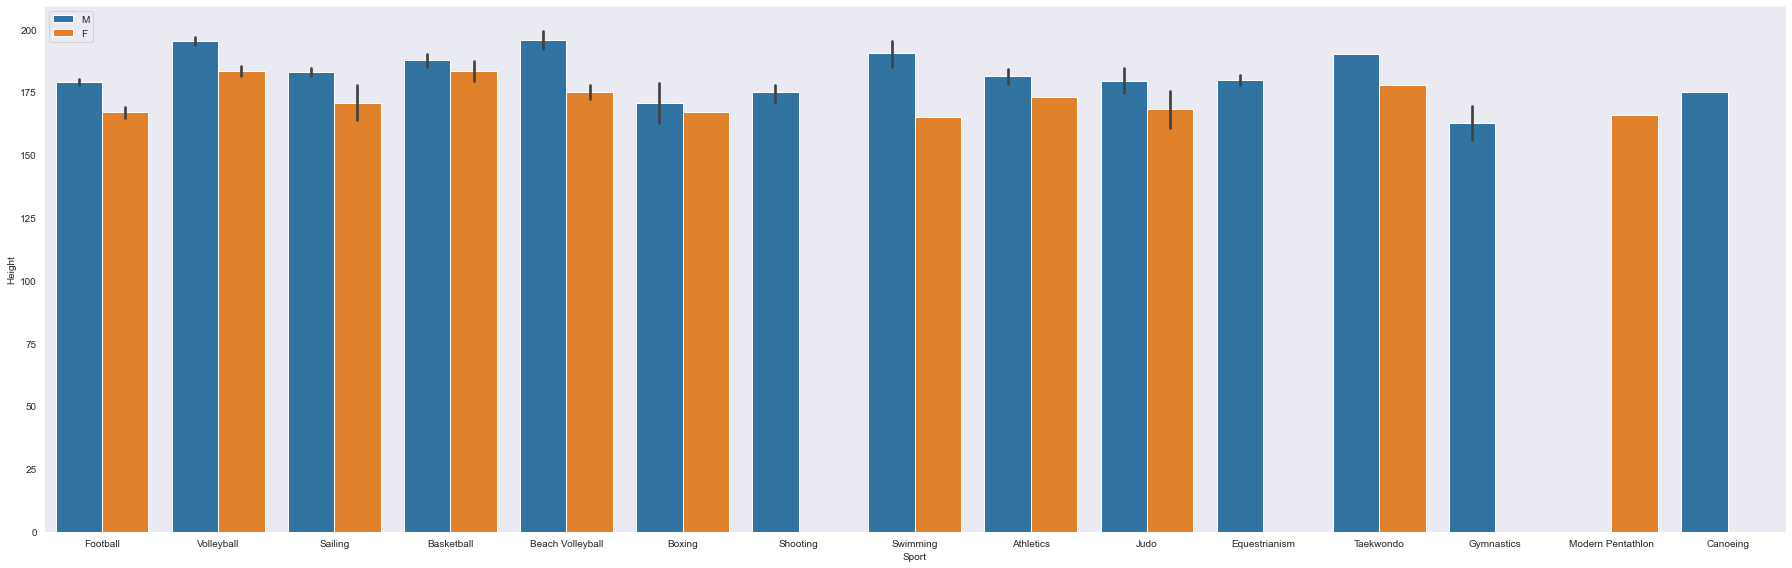

In [334]:
plt.figure(figsize=(25, 8))
sns.barplot(data=df_olimpiadas_med_br,
            x='Sport',
            y='Height', 
            hue='Sex');

plt.legend(loc='best');

plt.tight_layout();

Agora gere um gráfico semelhante ilustrando o peso dos atletas.

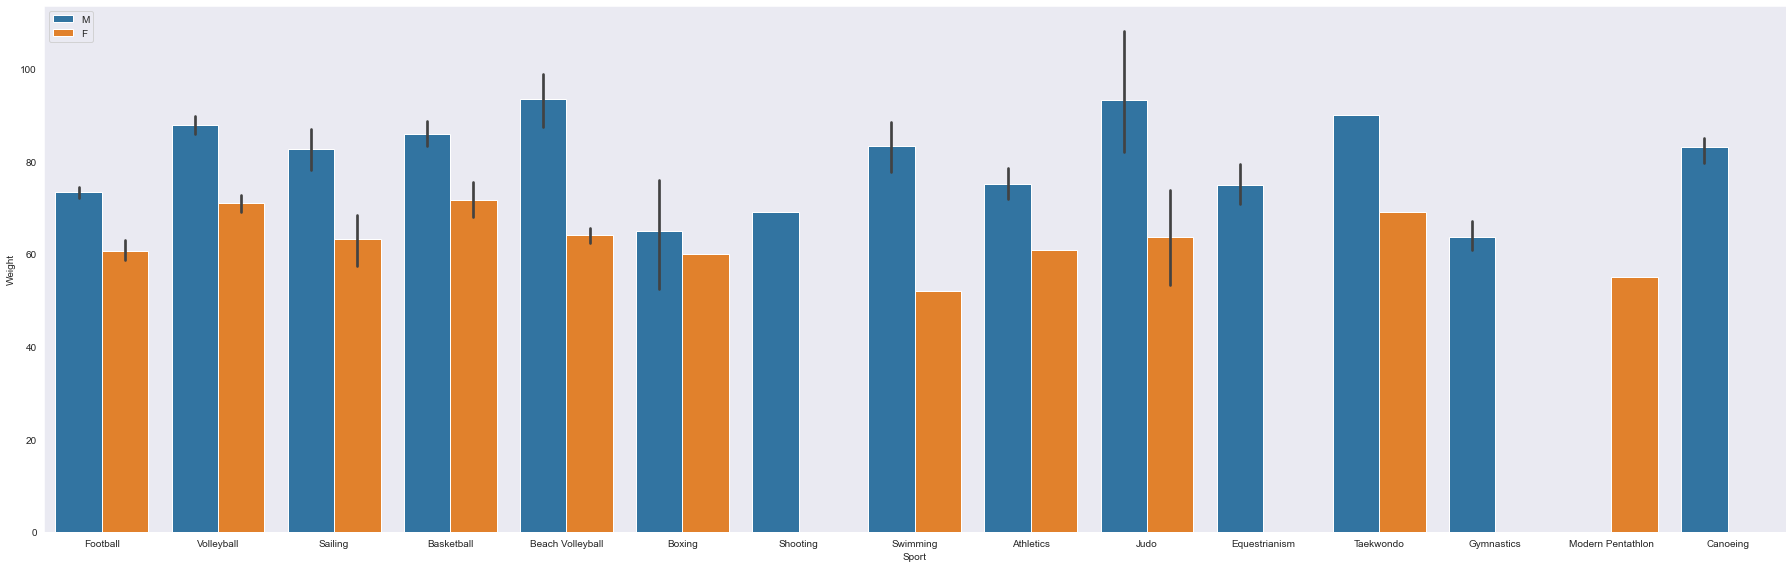

In [335]:
plt.figure(figsize=(25, 8))
sns.barplot(data=df_olimpiadas_med_br,
            x='Sport',
            y='Weight', 
            hue='Sex');

plt.legend(loc='best');

plt.tight_layout();

Vamos analisar agora as medalhas que nossos atletas trouxeram para casa.

Encontre os maiores medalhistas brasileiros em **total de medalhas**. Em seguida, faça um gráfico de barras empilhadas. No eixo X coloque o nome dos atletas, e no eixo Y coloque o número de medalhas. Utilize as barras empilhadas para mostrar, respectivamente, as medalhas de bronze, prata e ouro de cada atleta.

In [336]:
# Agrupando um DF por nome e medalhas, contando o quantidade de medalhas de cada tipo.
df_medalhista_br = df_olimpiadas_med_br.groupby(['Name', 'Medal'])['Medal'].count().reset_index(name='Count')
df_medalhista_br.head()

,Name,Medal,Count
0,Ademir Roque Kaefer,Silver,2
1,Adenzia Aparecida Ferreira da Silva,Gold,1
2,Adhemar Ferreira da Silva,Gold,2
3,"Adriana ""Adrianinha"" Moiss Pinto",Bronze,1
4,Adriana Aparecida dos Santos,Bronze,1


In [337]:
# Obtendo os indices e ordenando de forma decrescente os medalhista
index = df_medalhista_br.groupby('Name')['Count'].cumsum()
index.sort_values(ascending=False, inplace=True)
index.index

Int64Index([382, 324, 362, 381, 166, 103,  72, 323, 125, 156,
            ...
            151, 161, 160, 159, 157, 155, 154, 153, 152, 412],
           dtype='int64', length=413)

In [338]:
# Ordem que será mostrada
df_medalhista_br.loc[index.index].head()

,Name,Medal,Count
382,Torben Schmidt Grael,Silver,1
324,Robert Scheidt,Silver,2
362,"Srgio ""Escadinha"" Dutra dos Santos",Silver,2
381,Torben Schmidt Grael,Gold,2
166,Gustavo Frana Borges,Silver,2


In [339]:
# Agrupando cada tipo de medalha para ficar visível a quantidade dos tipos de medalhas.
fig = px.bar(df_medalhista_br.iloc[index.index],
             x='Name',
             y='Count',
             color='Medal',
             labels={'Medal':'Medalhas', 'Count':'Número de medalhas', 'Name':'Nomes'})
fig

Agora gere o mesmo gráfico de barras empilhadas substituindo os nomes dos atletas pelo nome de todos os esportes onde o Brasil já ganhou medalhas.

**DICA:** tome muito cuidado nessa análise: cada **evento esportivo** rende 1 medalha. Por exemplo, quando a equipe de futebol vence, isso é considerado 1 medalha, mesmo tendo cerca de 20 atletas medalhistas na equipe.

In [340]:
# Removendo eventos duplicados
df_medalhas_esporte = df_olimpiadas_med_br.drop_duplicates(subset=['Year', 'Event', 'Medal']).reset_index(drop=True)

# Criando coluna Peso para ordenar graficamente
df_medalhas_esporte['Peso'] = 0

# Gerando os pesos de acordo com a quatidade de medalhas de cada esporte
contador = df_medalhas_esporte.groupby('Sport')['Sport'].count()
contador.sort_values(ascending=False).to_dict()

# Colocando no df os pesos de cada esporte
for idx, sport in enumerate(df_medalhas_esporte.Sport):
    df_medalhas_esporte.Peso.iloc[idx] = contador[sport]

df_medalhas_esporte.sort_values(by='Peso', ascending=False, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [341]:
fig = px.histogram(df_medalhas_esporte,
       x='Sport',
       color='Medal')

fig.update_layout(yaxis_title='Quantidade de medalhas',
                  xaxis_title='Esportes',
                  legend_title='Tipos de Medalhas')

fig.show();

Mais um gráfico de barras empilhadas: agora mostre os **eventos esportivos** que renderam medalhas para o Brasil.

Lembrando: cada "categoria" dentro de um esporte é considerado um evento. Por exemplo, dentro de "atletismo", temos uma competição de 100m masculina, uma de 100m feminino, um revezamento 4 x 100m masculino, um revezamento 4 x 100m feminino, uma competição de 400m masculino, uma de 400m feminino, uma maratona masculina, uma maratona feminina, e assim sucessivamente.

In [342]:
fig = px.histogram(df_medalhas_esporte,
       x='Event',
       color='Medal')

fig.update_layout(yaxis_title='Quantidade de medalhas',
                  xaxis_title='Eventos',
                  legend_title='Tipos de Medalhas')

fig.show();

Utilize um gráfico de distribuição (como um histograma, por exemplo) ilustrando a quantidade total de medalhas do Brasil por esporte.

In [343]:
# Utilizando o DF de um ex anterior e ordenando por ordem alfabética crescente.
df_medalhas_esporte.sort_values(by='Sport', inplace=True)

px.histogram(df_medalhas_esporte,
                   x='Sport',
                   category_orders={"Medal": ["Bronze", "Silver", "Gold"]},
                   color='Medal')

Repita o procedimento acima, mas com medalhas de ouro.

In [344]:
# Utilizando o DF de um exercicio anterior e filtrando as medalhas de ouro.
df_medalhas_esporte_au = df_medalhas_esporte.query('Medal == "Gold"')

fig = px.histogram(df_medalhas_esporte_au,
                   x='Sport')

fig.update_layout(yaxis_title='Esportes medalhistas',
                  xaxis_title='Quantidade de medalhas de ouro')

fig

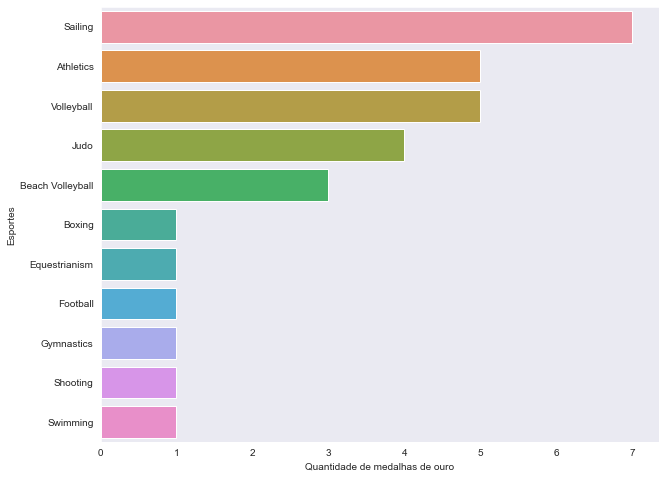

In [345]:
# Esse se saiu melhor
plt.figure(figsize=(10, 8))

fig = sns.barplot(y=df_medalhas_esporte_au.Sport.value_counts().index, x=df_medalhas_esporte_au.Sport.value_counts().values, orient='h');

fig.set(xlabel='Quantidade de medalhas de ouro',
        ylabel='Esportes');

Agora faça um gráfico de setores (pizza) mostrando a distribuição de medalhas de ouro do Brasil por esporte.

In [346]:
# Obtendo os valores de medalhas de ouro por esporte e normalizando.
esportes_med_au = df_medalhas_esporte_au.Sport.value_counts(normalize=True).reset_index(name='values')

px.pie(data_frame=esportes_med_au,
       values='values',
       names='index',
       title='Medalhas de ouro do Brasil por esporte (%)',
       color_discrete_sequence=px.colors.sequential.RdBu_r,
       hole=0.4)


Para finalizar a história do Brasil, vamos ver a série temporal de medalhas brasileiras. Crie um gráfico de linhas contendo 3 linhas: ouro, prata e bronze. Coloque no eixo X a edição da olimpíada (em ordem cronológica) e no eixo Y o total de medalhas de cada tipo.

In [347]:
# Agrupando por ano e tipo de medalha, contando para se obter a quantidade de medalhas por tipo.
df_medalhas_ano = df_medalhas_esporte.groupby(['Year', 'Medal'])['Medal'].count().reset_index(name='Medal_Count')

fig = px.line(df_medalhas_ano,
              x='Year',
              y='Medal_Count',
              title='Grafico de linhas',
              color='Medal',
              symbol='Medal',
              category_orders={"Medal": ["Bronze", "Silver", "Gold"]})

fig.update_traces(line_dash='dot')
fig

## 2. O mundo nos jogos de verão

Filtre o DataFrame original para conter apenas informações sobre os **medalhistas** de todos os países **nos jogos de verão**.



In [348]:
# Filtrando o DF pirncipal para pegar jogos que sejando de verão E que NÃO seja nulo as medalhas -> Jogos de verão E medalhista.
df_verao_medalhistas = df_olimpiadas.query('Season == "Summer"').dropna(subset=['Medal'])

df_verao_medalhistas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold


Utilizando subplots, crie 2 boxplots ilustrando a quantidade de medalhas por atleta. Em um deles, considere todos os atletas. No segundo, experimente remover os *outliers*.

In [349]:
# Obtendo a quantidade de medalhas por atletas.
df_med_summer = df_verao_medalhistas.Name.value_counts().reset_index(name='Medals').rename(columns={'index':'Nome'})
df_med_summer.describe()

,Medals
count,24545.000000
mean,1.388796
std,0.939906
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,28.000000


In [350]:
# Definindo o primeiro quartil.
q1 = df_med_summer.Medals.quantile(0.25)

# Definindo o terceiro quartil
q3 = df_med_summer.Medals.quantile(0.75)

# IQR
IQR = q3 - q1

# Obtendo limite inferior e superior.
limite_inferior = max(q1 - 1.5 * IQR, df_med_summer.Medals.min())
limite_superior = min(q3 + 1.5 * IQR, df_med_summer.Medals.max())

# Filtrando os valores.
df_med_summer_outliers =  df_med_summer[(df_med_summer.Medals >= limite_inferior) & (df_med_summer.Medals <= limite_superior)]

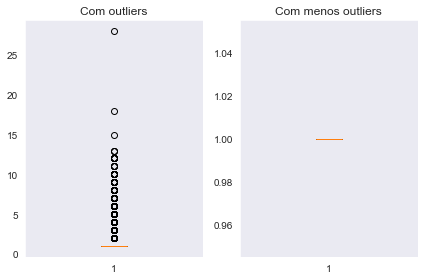

In [351]:
# Plotando
fig, axs = plt.subplots(1, 2);

axs[0].set_title('Com outliers')
axs[0].boxplot(df_med_summer.Medals);

axs[1].set_title('Com menos outliers')
axs[1].boxplot(df_med_summer_outliers.Medals);

plt.tight_layout();

In [352]:
# Apenas um teste de visualização com Plotly.
px.box(df_med_summer.Medals, points='all')

Descubra o total de medalhas de ouro de cada país (lembrando-se da restrição dos eventos esportivos, para não contabilizar múltiplas medalhas em esportes de equipe!).

Agora pegue os 10 países com mais medalhas e crie uma categoria "Outros" para o restante dos países. Exiba um gráfico de pizza mostrando a distribuição de medalhas de ouro entre essas 11 "equipes".

In [353]:
# Removendo possíveis medalhas duplicadas.
df_verao_med = df_verao_medalhistas.drop_duplicates(subset=['Year', 'Event', 'Medal'])

# Obtendo a quantidade de medalhas de ouro por país e ordenando-o em ordem decrescente.
df_verao_med_au = df_verao_med.query('Medal == "Gold"').NOC.value_counts(True).reset_index(name='Value').rename(columns={'index':'NOC'})

# Pegando os 10 países com mais medalhas de ouro.
df_best_of_ten = df_verao_med_au[:10]

# Colocando em outro DF os outro países após os 10 primeiros; Definindo todos com nome 'Outros' e somando suas medalhas.
df_rest_of_world = pd.DataFrame([['Outros', df_verao_med_au[10:]['Value'].sum()]], columns=['NOC', 'Value'])

# Concatenando os dois DFs no eixo das linhas (colocando abaixo) e rsetando seus index.
df_best_of_ten = pd.concat([df_best_of_ten, df_rest_of_world], ignore_index=True, axis='rows')

fig = px.pie(data_frame=df_best_of_ten,
       values='Value',
       names='NOC',
       title='Paises com maior quantidade de medalhas de ouro.',
       color_discrete_sequence=px.colors.sequential.Inferno,
       hole=0.4)

# Colocando o texto dentro do gráfico junto com sua porcentagem.
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show();

Repita o procedimento acima, mas mostrando o total de medalhas ao invés de apenas medalhas de ouro.

In [354]:
# Obtendo a quantidade de medalhas total por país e ordenando-o em ordem decrescente.
df_verao_med = df_verao_med.NOC.value_counts(True).reset_index(name='Value').rename(columns={'index':'NOC'})

# Pegando os 10 países com mais medalhas no geral.
df_best_of_ten = df_verao_med[:10]

# Colocando em outro DF os outro países após os 10 primeiros; Defininfo todos com nome 'Outros' e somando suas medalhas.
df_rest_of_world = pd.DataFrame([['Outros', df_verao_med[10:]['Value'].sum()]], columns=['NOC', 'Value'])

# Concatenando os dois DFs no eixo das linhas (colocando abaixo) e rsetando seus index.
df_best_of_ten_rest = pd.concat([df_best_of_ten, df_rest_of_world], ignore_index=True)

fig = px.pie(df_best_of_ten_rest,
       values='Value',
       names='NOC',
       title='Paises com maior quantidade de medalhas.',
       color_discrete_sequence=px.colors.sequential.Inferno,
       hole=0.4)

# Colocando o texto dentro do gráfico junto com sua porcentagem.
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show();

Crie um gráfico de barras empilhadas, com cada país das categorias acima no eixo X, total de medalhas no eixo Y, e barras empilhadas representando as medalhas de ouro, prata e bronze de cada país.

<AxesSubplot:xlabel='Quantidade de medalhas', ylabel='Paises'>

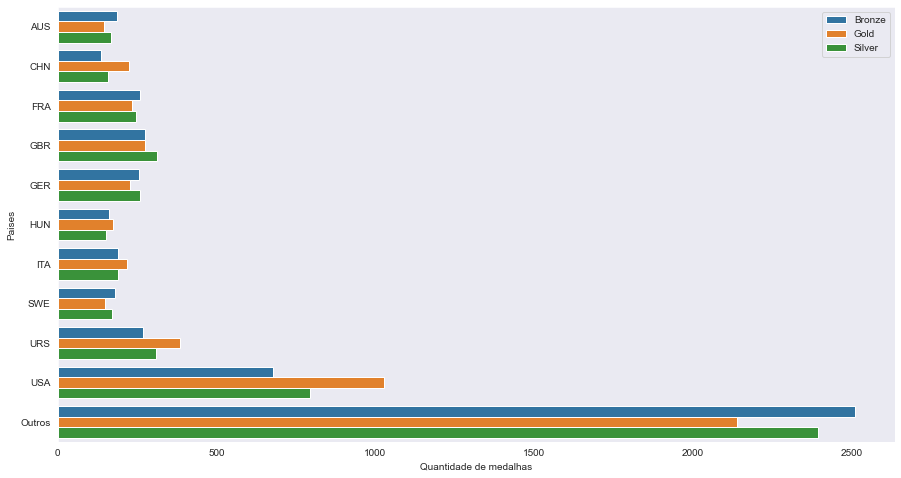

In [355]:
# Removendo possíveis medalhas duplicadas.
df_verao_med = df_verao_medalhistas.drop_duplicates(subset=['Year', 'Event', 'Medal'])

# Contabilizando medalhas por tipo.
df_verao_med = df_verao_med.groupby(['NOC', 'Medal'])['Medal'].count().reset_index(name='Count')

# Obtendo um DF apenas dos paises do exercício anterior.
df_best_of_ten = df_verao_med.loc[df_verao_med['NOC'].isin(df_best_of_ten['NOC'])].copy()

# Obtendo o restando dos países, ignorando ja obtidos anteriormente.
df_rest_of_world = df_verao_med.loc[~df_verao_med['NOC'].isin(df_best_of_ten['NOC'])].copy()

# Definindo a nacionalidade dos paises restante como 'Outros'
df_rest_of_world['NOC'] = 'Outros'
# E somando suas medalhas por tipos para contabilizar e comparar corretamente.
df_rest_of_world = df_rest_of_world.groupby(['NOC', 'Medal'])['Count'].sum().reset_index()

# Concatenando os dois DFs, pelo eixo das linhas (concatenando abaixo), e rmeovendo seus index.
df_verao_med_topten = pd.concat([df_best_of_ten, df_rest_of_world], ignore_index=True).copy()

plt.figure(figsize=(15, 8));

fig = sns.barplot(data=df_verao_med_topten,
                  x='Count',
                  y='NOC',
                  hue='Medal',
                  orient='h');

fig.set(xlabel='Quantidade de medalhas',
        ylabel='Paises');

fig.legend(loc='best');

fig

Crie um gráfico de distribuição (por exemplo, um histograma) mostrando a quantidade total de medalhas por país.

In [356]:
fig = px.histogram(data_frame=df_verao_med.sort_values(by='Count', ascending=False),
                   x='NOC',
                   y='Count',
                   title='Medalhas totais')

fig.update_layout(yaxis_title='Quantidade de medalhas',
                  xaxis_title='Países')

fig

**Desafio bônus:** Crie uma visualização da quantidade de medalhas de ouro e outra para quantidade total de medalhas por país, ambas utilizando mapas. Utilize o tipo de mapa que achar mais adequado.

In [357]:
# Filtrando o DF de um ex anterior para pegar apenas os medalhistas de ouro.
df = df_verao_med.query('Medal == "Gold"').copy()

# Utilizando o scatter_geo, passando as localizações do mapa com os valores 'NOC', definindo o tamanho da 'bolha' no gráfico
# através das quantidade de medalhas de ouro, projetando o gráfico 'natural earth' para essa visualização.
fig = px.scatter_geo(df,
                     locations="NOC",
                     hover_name="NOC",
                     size="Count",
                     projection="natural earth",
                     title='Medalhas de ouro no mundo',
                     labels={'Medal_Count':'Medalhas de ouro', 'NOC':'País'})

fig

In [358]:
df = df_verao_med.copy()

# Utilizando o scatter_geo, passando as localizações do mapa com os valores 'NOC', definindo o tamanho da 'bolha' no gráfico
# através das quantidade de medalhas totais, projetando o gráfico 'natural earth' para essa visualização.
fig = px.scatter_geo(df,
                     locations="NOC",
                     hover_name="NOC",
                     size="Count",
                     projection="natural earth",
                     title='Medalhas totais no mundo',
                     labels={'Medal_Count':'Medalhas totais', 'NOC':'País'})

fig

## 3. Brasil vs Mundo

Faça um gráfico de barras comparando os maiores medalhistas brasileiros com os maiores medalhistas do mundo em suas respectivas categorias.

Represente o esporte no eixo X, a quantidade de medalhas no eixo Y, coloque barras lado-a-lado representando os diferentes atletas de uma mesma modalidade e empilhe as medalhas de ouro, prata e bronze de cada atleta.

In [359]:
# Obtendo lista ordenada dos maiores medalhistas.
df_maiores_medalhistas = df_olimpiadas.dropna(subset=['Medal']).groupby(['Name', 'Sport', 'NOC'])['Name'].count().sort_values(ascending=False).reset_index(name='Count').copy()

# Obtendo os maiores medalhistas brasileiros.
df_maiores_medalhistas_br = df_maiores_medalhistas.query('NOC == "BRA"')

df_maiores_medalhistas_br.head()

,Name,Sport,NOC,Count
315,Robert Scheidt,Sailing,BRA,5
344,Torben Schmidt Grael,Sailing,BRA,5
511,Gustavo Frana Borges,Swimming,BRA,4
929,"Srgio ""Escadinha"" Dutra dos Santos",Volleyball,BRA,4
1045,Isaquias Queiroz dos Santos,Canoeing,BRA,3


In [360]:
# Criando um DF para cada atleta medalhista (##Melhorar esse ponto)
df_br1 = df_olimpiadas[df_olimpiadas.Name == df_maiores_medalhistas_br.Name.iloc[0]]
df_br2 = df_olimpiadas[df_olimpiadas.Name == df_maiores_medalhistas_br.Name.iloc[2]]

In [361]:
# Obtendo o nome dos gringos medalhista da mesma modalidade
nome_gringo1 = df_maiores_medalhistas[(df_maiores_medalhistas.Sport == df_maiores_medalhistas_br.Sport.iloc[0]) &
                                      (df_maiores_medalhistas.NOC != 'BRA')].iloc[0].Name

nome_gringo2 = df_maiores_medalhistas[(df_maiores_medalhistas.Sport == df_maiores_medalhistas_br.Sport.iloc[2]) &
                                      (df_maiores_medalhistas.NOC != 'BRA')].iloc[0].Name

In [362]:
# Criando um DF para cada atleta medalhista (##Melhorar esse ponto)
df_gringo1 = df_olimpiadas[df_olimpiadas.Name == nome_gringo1]
df_gringo2 = df_olimpiadas[df_olimpiadas.Name == nome_gringo2]

In [363]:
# Criando 2 DF de acordo com o esporte a ser comparado
df1 = pd.concat([df_br1, df_gringo1], axis='rows').dropna(subset=['Medal']).groupby(['Name', 'Sport', 'Medal', 'NOC'])['Medal'].count().reset_index(name='Count')

df2 = pd.concat([df_br2, df_gringo2], axis='rows').dropna(subset=['Medal']).groupby(['Name', 'Sport', 'Medal', 'NOC'])['Medal'].count().reset_index(name='Count')

In [364]:
fig = px.histogram(data_frame=df1, x=['Sport', 'NOC'], y='Count', color='Medal')

fig.update_layout(yaxis_title='Quantidade de medalhas',
                  xaxis_title='Esporte / Nacionalidade')

fig

In [365]:
fig = px.histogram(data_frame=df2, x=['Sport', 'NOC'], y='Count', color='Medal')

fig.update_layout(yaxis_title='Quantidade de medalhas',
                  xaxis_title='Esporte / Nacionalidade')

fig

Repita o procedimento acima, mas ao invés de atletas, considere o(s) esporte(s) onde o Brasil mais possui medalha comparando-os com o país com maior quantidade de medalhas naquele esporte.

In [366]:
# Obtendo lista ordenada dos maiores medalhistas.
df_maiores_medalhistas = df_olimpiadas.drop_duplicates(subset=['Year', 'Event', 'Medal']).dropna(subset=['Medal']).groupby(['Sport', 'NOC'])['Sport'].count().sort_values(ascending=False).reset_index(name='Count').copy()

# Obtendo os maiores medalhistas brasileiros.
df_maiores_medalhistas_br = df_maiores_medalhistas.query('NOC == "BRA"')

df_maiores_medalhistas_br.head()

,Sport,NOC,Count
234,Judo,BRA,19
248,Sailing,BRA,18
284,Athletics,BRA,16
323,Swimming,BRA,14
345,Beach Volleyball,BRA,13


In [367]:
# Criando um DF para cada esporte medalhista (##Melhorar esse ponto)
df_br1 = df_olimpiadas[(df_olimpiadas.Sport == df_maiores_medalhistas_br.Sport.iloc[0]) &
                       (df_olimpiadas.NOC == 'BRA')].drop_duplicates(subset=['Year', 'Event', 'Medal']).dropna(subset=['Medal'])
df_br2 = df_olimpiadas[(df_olimpiadas.Sport == df_maiores_medalhistas_br.Sport.iloc[1]) &
                       (df_olimpiadas.NOC == 'BRA')].drop_duplicates(subset=['Year', 'Event', 'Medal']).dropna(subset=['Medal'])

In [368]:
# Obtendo os nomes dos paises dos gringos medalhista da mesma modalidade de esporte que os maiores medlahostas brasileiros
pais_gringo1 = df_maiores_medalhistas[(df_maiores_medalhistas.Sport == df_maiores_medalhistas_br.Sport.iloc[0]) &
                                      (df_maiores_medalhistas.NOC != 'BRA')].NOC.iloc[0]

pais_gringo2 = df_maiores_medalhistas[(df_maiores_medalhistas.Sport == df_maiores_medalhistas_br.Sport.iloc[1]) &
                                      (df_maiores_medalhistas.NOC != 'BRA')].NOC.iloc[0]

In [369]:
# Criando um DF para cada pais medalhista (##Melhorar esse ponto)
df_gringo1 = df_olimpiadas[(df_olimpiadas.NOC == pais_gringo1) &
                           (df_olimpiadas.Sport == df_maiores_medalhistas_br.Sport.iloc[0])]\
    .drop_duplicates(subset=['Year', 'Event', 'Medal']).dropna(subset=['Medal'])

df_gringo2 = df_olimpiadas[(df_olimpiadas.NOC == pais_gringo2) &
                           (df_olimpiadas.Sport == df_maiores_medalhistas_br.Sport.iloc[0])]\
    .drop_duplicates(subset=['Year', 'Event', 'Medal']).dropna(subset=['Medal'])

In [370]:
# Criando 2 DF de acordo com o esporte a ser comparado
df1 = pd.concat([df_br1, df_gringo1], axis='rows').dropna(subset=['Medal']).groupby(['Name', 'Sport', 'Medal', 'NOC'])['Medal'].count().reset_index(name='Count')

df2 = pd.concat([df_br2, df_gringo2], axis='rows').dropna(subset=['Medal']).groupby(['Name', 'Sport', 'Medal', 'NOC'])['Medal'].count().reset_index(name='Count')

In [371]:
fig = px.histogram(data_frame=df1, x='NOC', y='Count', color='Medal', title=df_maiores_medalhistas_br.Sport.iloc[0])

fig.update_layout(yaxis_title='Quantidade de medalhas',
                  xaxis_title='Nacionalidade')

fig

In [372]:
fig = px.histogram(data_frame=df2, x='NOC', y='Count', color='Medal', title=df_maiores_medalhistas_br.Sport.iloc[1])

fig.update_layout(yaxis_title='Quantidade de medalhas',
                  xaxis_title='Nacionalidade')

fig

Para finalizar, repita os gráficos que você gerou com os 10 países com mais medalhas, mas remova o Brasil da categoria "Outros" e mostre-o também no gráfico.

In [431]:
# Removendo possíveis medalhas duplicadas e removendo o Brasil da captura de dados.
df_verao_med1 = df_verao_medalhistas[df_verao_medalhistas.NOC != 'BRA'].drop_duplicates(subset=['Year', 'Event', 'Medal']).copy()

# Obtendo a quantidade de medalhas totais por país em percentual e ordenando-as em ordem decrescente.
df_verao_med1 = df_verao_med1.NOC.value_counts(True).reset_index(name='Value').rename(columns={'index':'NOC'})

# Pegando os 10 países com mais medalhas.
df_best_of_ten = df_verao_med1[:10]

# Colocando em outro DF os outro países após os 10 primeiros; Definindo todos com nome 'Outros' e somando suas medalhas.
df_rest_of_world = pd.DataFrame([['Outros', df_verao_med1[10:]['Value'].sum()]], columns=['NOC', 'Value'])

# Concatenando os dois DFs no eixo das linhas (colocando abaixo) e rsetando seus index.
df_best_of_ten = pd.concat([df_best_of_ten, df_rest_of_world], ignore_index=True, axis='rows')

fig = px.pie(data_frame=df_best_of_ten,
             values='Value',
             names='NOC',
             title='Paises com maior quantidade de medalhas de ouro.',
             color_discrete_sequence=px.colors.sequential.Inferno,
             hole=0.4)

# Colocando o texto dentro do gráfico junto com sua porcentagem.
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show();